# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 12:**  
Period = 11.0984547912  
tdepth = 0.0330323940**2
   
  - **Sector 13:**  
Period = 11.0984952861   
tdepth = 0.0330323940**2

In [2]:
ID = 407126408
sectors = np.array([12])

period = 11.0984547912
tdepth = 0.0330323940**2

lc = pd.read_csv("TOI_913_12.csv", header=None)
contrastcurve_file = "Gemini_8m_I.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

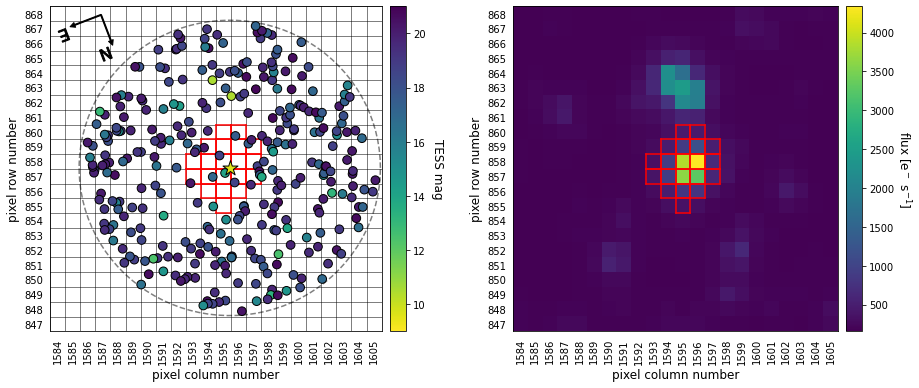

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,407126408,9.6181,8.842,8.384,8.273,234.573404,-80.803786,0.82,0.732535,4969.0,15.313900,0.000,0.000
1,407126405,14.0491,12.851,12.244,12.127,234.588167,-80.802581,NaN,10.033800,4831.0,0.162487,9.538,62.953
2,1104069681,18.6552,NaN,NaN,NaN,234.574638,-80.797815,NaN,NaN,5045.0,0.516863,21.507,1.892
3,1104069490,18.6630,NaN,NaN,NaN,234.585947,-80.809695,NaN,NaN,3824.0,1.463210,22.463,161.272
4,407126406,16.9724,16.170,15.494,15.474,234.619120,-80.802863,0.96,1.159260,5469.0,0.297355,26.512,82.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1104069719,20.3636,NaN,NaN,NaN,234.665508,-80.750090,NaN,NaN,NaN,3.691040,200.476,15.418
310,1104090254,19.0136,NaN,NaN,NaN,234.273351,-80.775302,0.93,0.590987,5367.0,-0.301626,201.017,300.523
311,407126384,16.5611,15.355,14.846,14.555,234.868610,-80.773542,0.77,0.947195,4761.0,0.662614,201.977,57.527
312,407126367,16.9443,15.735,15.146,14.639,234.459657,-80.750708,0.71,0.942899,4492.0,0.650390,202.036,340.988


In [4]:
ap = np.array([[1595, 855], [1594, 856], [1595, 856], [1596, 856], [1593, 857], 
               [1594, 857], [1595, 857], [1596, 857], [1597, 857], [1593, 858], 
               [1594, 858], [1595, 858], [1596, 858], [1597, 858], [1594, 859], 
               [1595, 859], [1596, 859], [1597, 859], [1595, 860], [1596, 860]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,407126408,9.6181,8.842,8.384,8.273,234.573404,-80.803786,0.82,0.732535,4969.0,15.313900,0.000,0.000,9.637753e-01,0.001132
1,407126405,14.0491,12.851,12.244,12.127,234.588167,-80.802581,NaN,10.033800,4831.0,0.162487,9.538,62.953,1.622398e-02,0.067255
2,1104069681,18.6552,NaN,NaN,NaN,234.574638,-80.797815,NaN,NaN,5045.0,0.516863,21.507,1.892,2.087993e-04,0.000000
3,1104069490,18.6630,NaN,NaN,NaN,234.585947,-80.809695,NaN,NaN,3824.0,1.463210,22.463,161.272,2.235535e-04,0.000000
4,407126406,16.9724,16.170,15.494,15.474,234.619120,-80.802863,0.96,1.159260,5469.0,0.297355,26.512,82.830,1.044776e-03,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1104069719,20.3636,NaN,NaN,NaN,234.665508,-80.750090,NaN,NaN,NaN,3.691040,200.476,15.418,3.261694e-24,0.000000
310,1104090254,19.0136,NaN,NaN,NaN,234.273351,-80.775302,0.93,0.590987,5367.0,-0.301626,201.017,300.523,9.173152e-28,0.000000
311,407126384,16.5611,15.355,14.846,14.555,234.868610,-80.773542,0.77,0.947195,4761.0,0.662614,201.977,57.527,2.132736e-24,0.000000
312,407126367,16.9443,15.735,15.146,14.639,234.459657,-80.750708,0.71,0.942899,4492.0,0.650390,202.036,340.988,2.217069e-27,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

407126405
407126402
407126397
407126407
407126425


# Ploting CC File

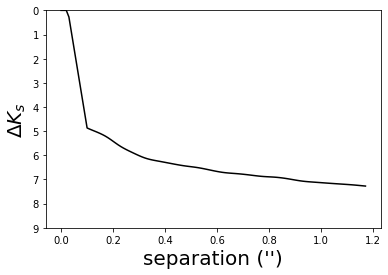

In [7]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 407126408.
Calculating EB and EBx2P scenario probabilities for 407126408.
Calculating PTP scenario probability for 407126408.
Calculating PEB and PEBx2P scenario probabilities for 407126408.
Calculating STP scenario probability for 407126408.
Calculating SEB and SEBx2P scenario probabilities for 407126408.
Calculating DTP scenario probability for 407126408.
Calculating DEB and DEBx2P scenario probabilities for 407126408.
Calculating BTP scenario probability for 407126408.
Calculating BEB and BEBx2P scenario probabilities for 407126408.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407126405.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407126402.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407126397.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407126407.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 407126425.
Wall time: 1h 37min 48s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  7.633426553632638e-05
NFPP =  1.2050751133023544e-26


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,407126408,TP,0.820000,0.732535,11.098455,88.820961,0.403680,0.501168,177.575695,2.974910,0.000000,0.000000,9.148380e-01
1,407126408,EB,0.820000,0.732535,11.098455,86.583226,1.953334,0.004375,49.334028,0.000000,0.702681,0.732535,1.258359e-49
2,407126408,EBx2P,0.820000,0.732535,22.196910,88.302320,1.133602,0.744550,210.779689,0.000000,0.787060,0.732535,1.957156e-21
3,407126408,PTP,0.820000,0.732535,11.098455,88.683952,0.617353,0.593093,216.741076,2.937615,0.000000,0.000000,2.442574e-02
4,407126408,PEB,0.820000,0.732535,11.098455,88.533230,0.494752,0.637861,193.204246,0.000000,0.103856,0.125474,3.835000e-30
5,407126408,PEBx2P,0.820000,0.732535,22.196910,88.805646,0.261427,0.858284,171.864906,0.000000,0.810992,0.732535,3.515951e-07
6,407126408,STP,0.559979,0.568726,11.098455,89.777364,0.135606,0.220453,231.576884,6.294223,0.000000,0.000000,2.777676e-05
7,407126408,SEB,0.188345,0.219300,11.098455,89.368703,0.092735,0.897310,156.710671,0.000000,0.041962,0.100000,6.143466e-06
8,407126408,SEBx2P,0.210580,0.239601,22.196910,89.489332,0.552953,0.714223,194.962523,0.000000,0.202227,0.232028,2.640265e-06
9,407126408,DTP,0.820000,0.732535,11.098455,88.818153,0.379175,0.461167,161.568773,2.931385,0.000000,0.000000,6.065993e-02


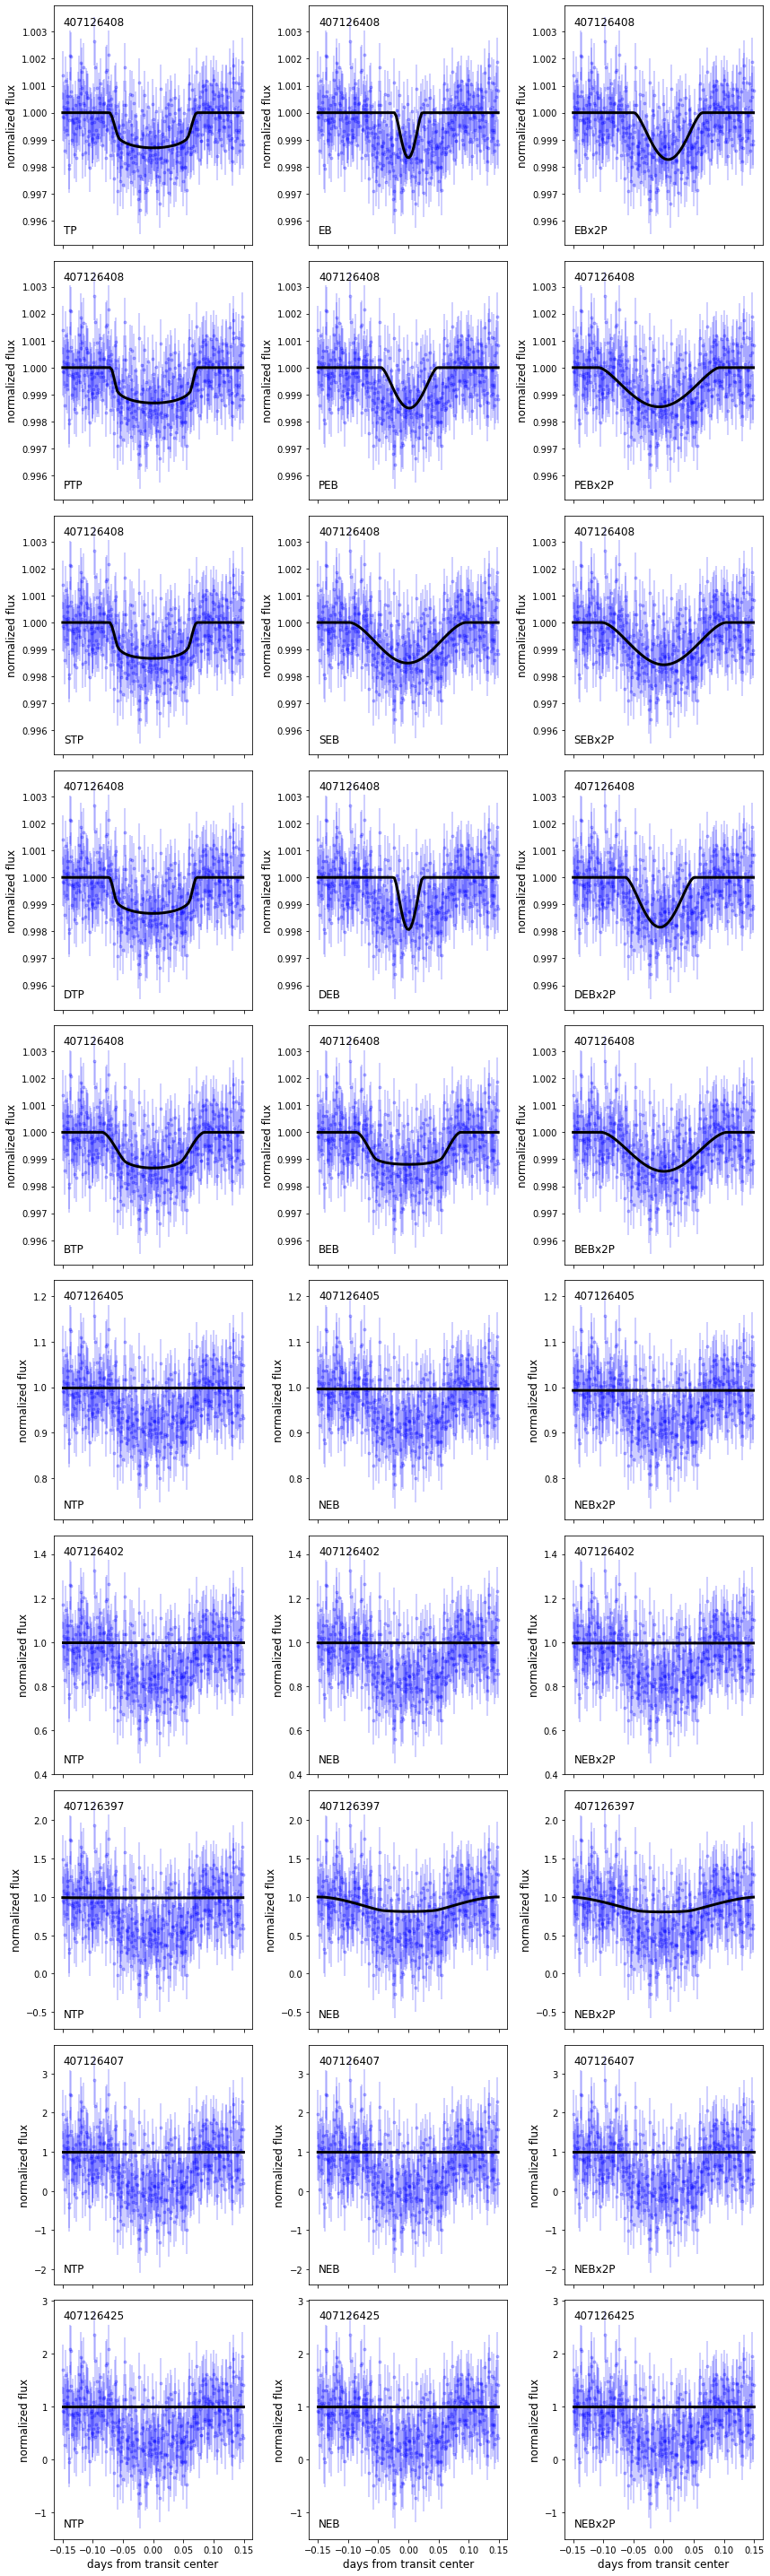

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))